In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
import plotly.figure_factory as ff

In [2]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [3]:
# Load dataset
demographics_data = pd.read_csv('demographics_train.csv')
election_data = pd.read_csv('election_train.csv')

In [4]:
demographics_data.shape

(1216, 17)

In [5]:
election_data.shape

(2405, 6)

In [6]:
# Map State names to abbreviations
demographics_data['State'] = demographics_data['State'].map(us_state_abbrev)

In [7]:
# Convert all counties to lowercase
demographics_data['County'] = demographics_data['County'].str.lower()
election_data['County'] = election_data['County'].str.lower()

In [8]:
# Sort the data by State, County for cleaner output
demographics_data = demographics_data.sort_values(by=['State','County'])
election_data = election_data.sort_values(by=['State','County'])

In [9]:
# Remove 'County' from county names
for i in range(len(election_data['County'])):
    election_data['County'][i] = election_data['County'][i].replace(' county', '')

In [10]:
# Task 1

In [11]:
election_wide_data = pd.pivot_table(election_data, index=['Year','State','County','Office'], columns='Party', values='Votes').reset_index()

In [12]:
election_wide_data.shape

(1205, 6)

In [13]:
# Task 2

In [14]:
merged_data = pd.merge(demographics_data, election_wide_data, left_index=True, on = ['State','County'], how='inner');

In [15]:
merged_data.head()

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,...,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Year,Office,Democratic,Republican
0,AZ,apache,4001,72346,0,18.571863,0.486551,5.947806,1.719515,50.598513,...,13.322091,32460,15.807433,21.758252,88.941063,74.061076,2018,US Senator,16298.0,7810.0
1,AZ,cochise,4003,128177,92915,56.299492,3.714395,34.403208,11.458374,49.069646,...,19.756275,45383,8.567108,13.409171,76.837055,36.301067,2018,US Senator,17383.0,26929.0
2,AZ,coconino,4005,138064,104265,54.619597,1.342855,13.711033,4.825298,50.581614,...,10.873943,51106,8.238305,11.085381,65.791439,31.466066,2018,US Senator,34240.0,19249.0
3,AZ,gila,4007,53179,0,63.222325,0.552850,18.548675,4.249798,50.296170,...,26.397638,40593,12.129932,15.729958,82.262624,41.062000,2018,US Senator,7643.0,12180.0
4,AZ,graham,4009,37529,0,51.461536,1.811932,32.097844,4.385942,46.313518,...,12.315809,47422,14.424104,14.580797,86.675944,46.437399,2018,US Senator,3368.0,6870.0


In [16]:
merged_data.shape

(1200, 21)

In [17]:
# Task 3

In [18]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1204
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   State                                  1200 non-null   object 
 1   County                                 1200 non-null   object 
 2   FIPS                                   1200 non-null   int64  
 3   Total Population                       1200 non-null   int64  
 4   Citizen Voting-Age Population          1200 non-null   int64  
 5   Percent White, not Hispanic or Latino  1200 non-null   float64
 6   Percent Black, not Hispanic or Latino  1200 non-null   float64
 7   Percent Hispanic or Latino             1200 non-null   float64
 8   Percent Foreign Born                   1200 non-null   float64
 9   Percent Female                         1200 non-null   float64
 10  Percent Age 29 and Under               1200 non-null   float64
 11  Perc

In [19]:
# Task 4

In [20]:
merged_data.isnull().sum()

State                                    0
County                                   0
FIPS                                     0
Total Population                         0
Citizen Voting-Age Population            0
Percent White, not Hispanic or Latino    0
Percent Black, not Hispanic or Latino    0
Percent Hispanic or Latino               0
Percent Foreign Born                     0
Percent Female                           0
Percent Age 29 and Under                 0
Percent Age 65 and Older                 0
Median Household Income                  0
Percent Unemployed                       0
Percent Less than High School Degree     0
Percent Less than Bachelor's Degree      0
Percent Rural                            0
Year                                     0
Office                                   0
Democratic                               3
Republican                               2
dtype: int64

In [21]:
bool1 = pd.isnull(merged_data['Republican'])
merged_data[bool1]

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,...,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Year,Office,Democratic,Republican
753,TX,bee,48025,32706,0,32.660674,7.989360,57.909864,4.344769,39.579894,...,11.514707,44005,6.065048,28.602944,91.094503,42.977308,2018,US Senator,2811.0,NaN
1119,WI,lafayette,55065,16793,0,94.771631,0.339427,3.507414,2.286667,49.199071,...,16.709343,53038,2.998885,10.123457,82.336861,100.000000,2018,US Senator,3592.0,NaN


In [22]:
bool2 = pd.isnull(merged_data['Democratic'])
merged_data[bool2]

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,...,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Year,Office,Democratic,Republican
425,NE,lancaster,31109,301707,0,82.659667,3.783472,6.531834,7.523856,49.891782,...,12.175057,53730,4.372984,6.636272,62.697684,8.253126,2018,US Senator,NaN,49449.0
716,TN,meigs,47121,11804,0,94.713656,1.330058,1.465605,1.067435,50.626906,...,19.662826,35209,12.544170,21.141176,91.176471,100.000000,2018,US Senator,NaN,2694.0
869,TX,menard,48327,2163,0,56.310680,1.248266,39.389736,4.299584,46.833102,...,22.468793,37917,8.360836,21.113990,84.909326,100.000000,2018,US Senator,NaN,632.0


In [23]:
merged_data = merged_data.dropna()

In [24]:
merged_data.shape

(1195, 21)

In [25]:
merged_data[merged_data['Citizen Voting-Age Population']==0]

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,...,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Year,Office,Democratic,Republican
0,AZ,apache,4001,72346,0,18.571863,0.486551,5.947806,1.719515,50.598513,...,13.322091,32460,15.807433,21.758252,88.941063,74.061076,2018,US Senator,16298.0,7810.0
3,AZ,gila,4007,53179,0,63.222325,0.552850,18.548675,4.249798,50.296170,...,26.397638,40593,12.129932,15.729958,82.262624,41.062000,2018,US Senator,7643.0,12180.0
4,AZ,graham,4009,37529,0,51.461536,1.811932,32.097844,4.385942,46.313518,...,12.315809,47422,14.424104,14.580797,86.675944,46.437399,2018,US Senator,3368.0,6870.0
7,AZ,mohave,4015,203629,0,78.252606,0.951731,15.708470,6.969047,49.676618,...,26.858650,39856,11.680953,16.145850,88.121178,22.963644,2018,US Senator,19214.0,50209.0
9,AZ,pima,4019,1003338,0,53.271579,3.199719,36.105978,12.903428,50.807405,...,17.801778,46764,9.214114,12.252238,69.199391,7.523491,2018,US Senator,221242.0,160550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,WY,converse,56009,14223,0,88.849047,0.007031,7.691767,2.706883,49.933207,...,13.668003,66737,5.282284,9.758393,84.468152,55.360370,2018,US Senator,834.0,3959.0
1195,WY,goshen,56015,13546,0,86.409272,0.147645,10.519711,2.724051,47.091392,...,20.389783,44883,6.918819,8.390574,77.036880,45.995924,2018,US Senator,1020.0,3658.0
1197,WY,lincoln,56023,18543,0,92.600982,0.210322,4.416761,2.151755,48.773122,...,14.382786,64579,5.618095,6.949996,79.631291,82.729482,2018,US Senator,1152.0,5846.0
1201,WY,sublette,56035,10032,0,91.646730,0.000000,7.814992,2.053429,46.949761,...,13.337321,76004,2.786971,4.658830,75.645069,100.000000,2018,US Senator,668.0,2653.0


In [26]:
merged_data = merged_data.drop('Citizen Voting-Age Population', axis=1)

In [27]:
merged_data.shape

(1195, 20)

In [28]:
# Task 5

In [29]:
# Create a new boolean column where value = true if # of Democratic votes is greater than Republican votes, else false
merged_data['Party'] = merged_data.apply(lambda row: row.Democratic > row.Republican, axis=1)

# Map true, false values of the new column to 1, 0
merged_data['Party'] = merged_data['Party'].astype(int)

In [30]:
merged_data.head()

,State,County,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,...,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Year,Office,Democratic,Republican,Party
0,AZ,apache,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,...,32460,15.807433,21.758252,88.941063,74.061076,2018,US Senator,16298.0,7810.0,1
1,AZ,cochise,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,...,45383,8.567108,13.409171,76.837055,36.301067,2018,US Senator,17383.0,26929.0,0
2,AZ,coconino,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,...,51106,8.238305,11.085381,65.791439,31.466066,2018,US Senator,34240.0,19249.0,1
3,AZ,gila,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,...,40593,12.129932,15.729958,82.262624,41.062000,2018,US Senator,7643.0,12180.0,0
4,AZ,graham,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,...,47422,14.424104,14.580797,86.675944,46.437399,2018,US Senator,3368.0,6870.0,0


In [31]:
# Task 6

In [32]:
merged_data[merged_data['Party']==1]['Median Household Income'].mean()

53798.732307692306

In [33]:
merged_data[merged_data['Party']==0]['Median Household Income'].mean()

48746.81954022989

In [34]:
merged_data[merged_data['Party']==1]['Median Household Income'].std()

15289.130077404621

In [35]:
merged_data[merged_data['Party']==0]['Median Household Income'].std()

10670.729411820219

In [36]:
ttest_ind(merged_data[merged_data['Party']==1]['Median Household Income'], merged_data[merged_data['Party']==0]['Median Household Income'], equal_var=False)


Ttest_indResult(statistic=5.479141589767387, pvalue=7.149437363182572e-08)

In [37]:
# Task 7

In [38]:
merged_data[merged_data['Party']==1]['Total Population'].mean()

300998.3169230769

In [39]:
merged_data[merged_data['Party']==0]['Total Population'].mean()

53864.6724137931

In [40]:
merged_data[merged_data['Party']==1]['Total Population'].std()

553600.0257123302

In [41]:
merged_data[merged_data['Party']==0]['Total Population'].std()

94192.57279397613

In [42]:
ttest_ind(merged_data[merged_data['Party']==1]['Total Population'], merged_data[merged_data['Party']==0]['Total Population'], equal_var=False)


Ttest_indResult(statistic=8.004638577960957, pvalue=2.0478717602973023e-14)

In [43]:
# Task 8

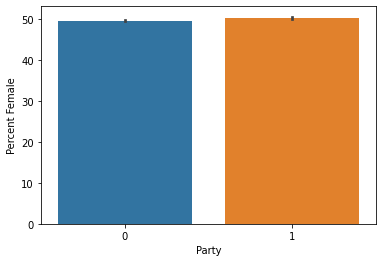

In [44]:
merged_data.groupby(['Party'])
sns.barplot(x='Party',y='Percent Female',data=merged_data)

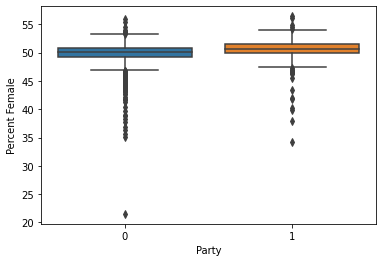

In [45]:
sns.boxplot(x='Party',y='Percent Female',data=merged_data)

In [46]:
merged_data[merged_data['Party']==0][['Percent Female']].describe()

,Percent Female
count,870.000000
mean,49.630898
std,2.429013
min,21.513413
25%,49.222905
50%,50.176792
75%,50.829770
max,55.885023


In [47]:
merged_data[merged_data['Party']==1][['Percent Female']].describe()

,Percent Female
count,325.000000
mean,50.385433
std,2.149359
min,34.245291
25%,49.854280
50%,50.653830
75%,51.492075
max,56.418468


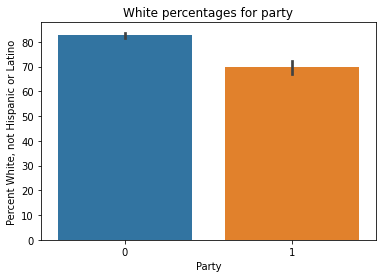

In [48]:
ax = sns.barplot(x="Party", y="Percent White, not Hispanic or Latino", data=merged_data).set_title("White percentages for party")

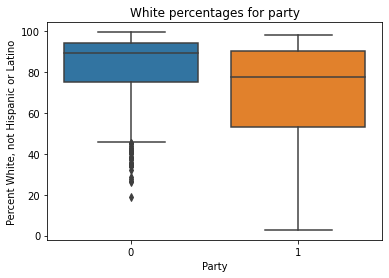

In [49]:
ax = sns.boxplot(x="Party", y="Percent White, not Hispanic or Latino", data=merged_data).set_title("White percentages for party")

In [50]:
merged_data[merged_data['Party']==0][["Percent White, not Hispanic or Latino","Party"]].describe()

,"Percent White, not Hispanic or Latino",Party
count,870.000000,870.0
mean,82.656646,0.0
std,16.056122,0.0
min,18.758977,0.0
25%,75.016397,0.0
50%,89.434849,0.0
75%,94.466596,0.0
max,99.627329,0.0


In [51]:
merged_data[merged_data['Party']==1][["Percent White, not Hispanic or Latino","Party"]].describe()

,"Percent White, not Hispanic or Latino",Party
count,325.000000,325.0
mean,69.683766,1.0
std,24.981502,0.0
min,2.776702,1.0
25%,53.271579,1.0
50%,77.786090,1.0
75%,90.300749,1.0
max,98.063495,1.0


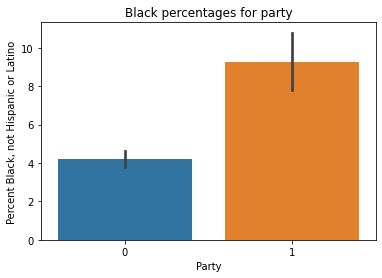

In [52]:
ax = sns.barplot(x="Party", y="Percent Black, not Hispanic or Latino", data=merged_data).set_title("Black percentages for party")

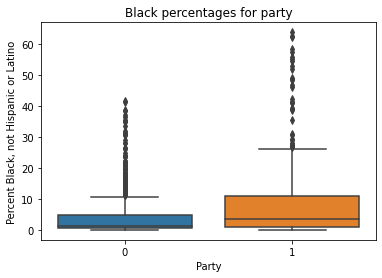

In [53]:
ax = sns.boxplot(x="Party", y="Percent Black, not Hispanic or Latino", data=merged_data).set_title("Black percentages for party")

In [54]:
merged_data[merged_data['Party']==0][["Percent Black, not Hispanic or Latino","Party"]].describe()

,"Percent Black, not Hispanic or Latino",Party
count,870.000000,870.0
mean,4.189241,0.0
std,6.721695,0.0
min,0.000000,0.0
25%,0.460419,0.0
50%,1.318311,0.0
75%,4.753831,0.0
max,41.563041,0.0


In [55]:
merged_data[merged_data['Party']==1][["Percent Black, not Hispanic or Latino","Party"]].describe()

,"Percent Black, not Hispanic or Latino",Party
count,325.000000,325.0
mean,9.242649,1.0
std,13.351340,0.0
min,0.000000,1.0
25%,0.839103,1.0
50%,3.485992,1.0
75%,11.058843,1.0
max,63.953279,1.0


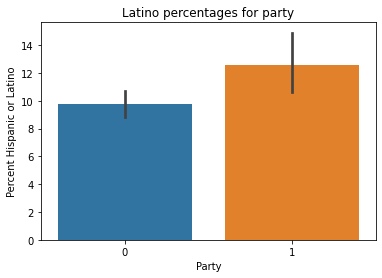

In [56]:
ax = sns.barplot(x="Party", y="Percent Hispanic or Latino", data=merged_data).set_title("Latino percentages for party")

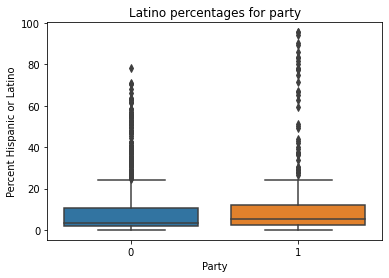

In [57]:
ax = sns.boxplot(x="Party", y="Percent Hispanic or Latino", data=merged_data).set_title("Latino percentages for party")

In [58]:
merged_data[merged_data['Party']==0][["Percent Hispanic or Latino"]].describe()

,Percent Hispanic or Latino
count,870.000000
mean,9.733094
std,14.049576
min,0.000000
25%,1.704539
50%,3.427435
75%,10.709696
max,78.397012


In [59]:
merged_data[merged_data['Party']==1][["Percent Hispanic or Latino"]].describe()

,Percent Hispanic or Latino
count,325.000000
mean,12.587391
std,19.575030
min,0.193349
25%,2.531017
50%,5.039747
75%,11.857116
max,95.479801


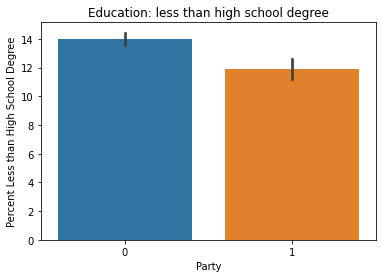

In [60]:
ax = sns.barplot(x="Party", y="Percent Less than High School Degree", data=merged_data).set_title("Education: less than high school degree")

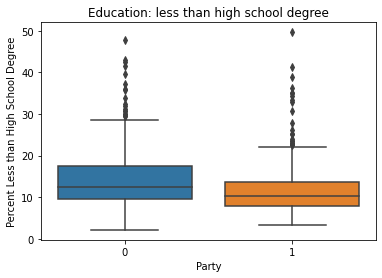

In [61]:
ax = sns.boxplot(x="Party", y="Percent Less than High School Degree", data=merged_data).set_title("Education: less than high school degree")

In [62]:
merged_data[merged_data['Party']==0][["Percent Less than High School Degree"]].describe()

,Percent Less than High School Degree
count,870.000000
mean,14.009112
std,6.303126
min,2.134454
25%,9.662491
50%,12.572435
75%,17.447168
max,47.812773


In [63]:
merged_data[merged_data['Party']==1][["Percent Less than High School Degree"]].describe()

,Percent Less than High School Degree
count,325.000000
mean,11.883760
std,6.505613
min,3.215803
25%,7.893714
50%,10.370080
75%,13.637059
max,49.673777


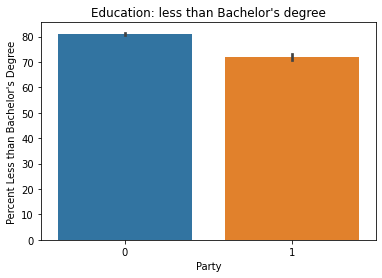

In [64]:
ax = sns.barplot(x="Party", y="Percent Less than Bachelor's Degree", data=merged_data).set_title("Education: less than Bachelor's degree")

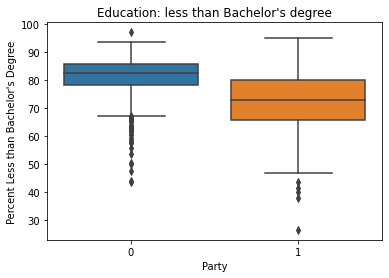

In [65]:
ax = sns.boxplot(x="Party", y="Percent Less than Bachelor's Degree", data=merged_data).set_title("Education: less than Bachelor's degree")

In [66]:
merged_data[merged_data['Party']==0][["Percent Less than Bachelor's Degree"]].describe()

,Percent Less than Bachelor's Degree
count,870.000000
mean,81.095427
std,6.815537
min,43.419470
25%,78.108424
50%,82.406700
75%,85.546272
max,97.014925


In [67]:
merged_data[merged_data['Party']==1][["Percent Less than Bachelor's Degree"]].describe()

,Percent Less than Bachelor's Degree
count,325.000000
mean,71.968225
std,11.192404
min,26.335440
25%,65.711800
50%,72.736143
75%,79.903653
max,94.849957


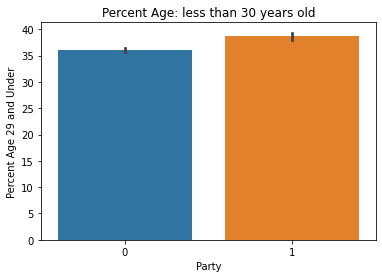

In [68]:
ax = sns.barplot(x="Party", y="Percent Age 29 and Under", data=merged_data).set_title("Percent Age: less than 30 years old")

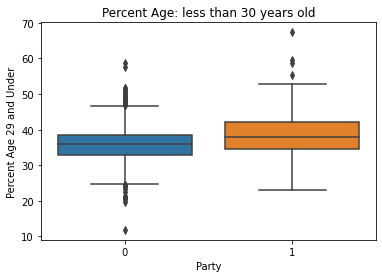

In [69]:
ax = sns.boxplot(x="Party", y="Percent Age 29 and Under", data=merged_data).set_title("Percent Age: less than 30 years old")

In [70]:
middle_aged = merged_data
middle_aged['Middle Age'] = 100 - middle_aged['Percent Age 29 and Under'] - middle_aged['Percent Age 65 and Older']
middle_aged = middle_aged[['Middle Age', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Party']]

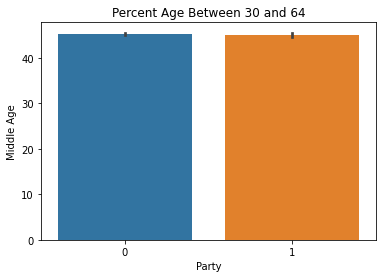

In [71]:
ax = sns.barplot(x="Party", y="Middle Age", data=middle_aged).set_title("Percent Age Between 30 and 64")

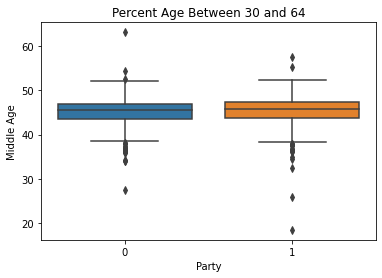

In [72]:
ax = sns.boxplot(x="Party", y="Middle Age", data=middle_aged).set_title("Percent Age Between 30 and 64")

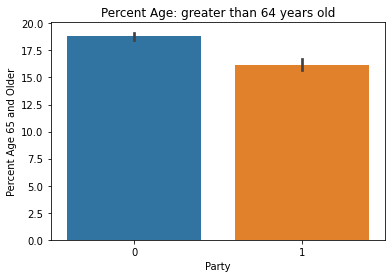

In [73]:
ax = sns.barplot(x="Party", y="Percent Age 65 and Older", data=merged_data).set_title("Percent Age: greater than 64 years old")

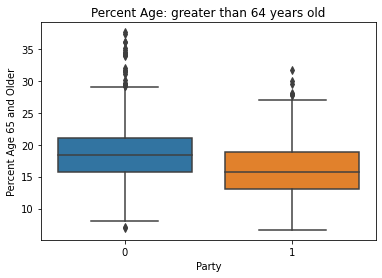

In [74]:
ax = sns.boxplot(x="Party", y="Percent Age 65 and Older", data=merged_data).set_title("Percent Age: greater than 64 years old")

In [75]:
middle_aged[middle_aged['Party']==0].describe()

,Middle Age,Percent Age 29 and Under,Percent Age 65 and Older,Party
count,870.000000,870.000000,870.000000,870.0
mean,45.166015,36.005719,18.828267,0.0
std,2.910264,5.181522,4.733155,0.0
min,27.421759,11.842105,6.954387,0.0
25%,43.522522,32.983652,15.784982,0.0
50%,45.553295,35.846532,18.377896,0.0
75%,46.975771,38.539787,21.112847,0.0
max,63.157895,58.749116,37.622759,0.0


In [76]:
middle_aged[middle_aged['Party']==1].describe()

,Middle Age,Percent Age 29 and Under,Percent Age 65 and Older,Party
count,325.000000,325.000000,325.000000,325.0
mean,45.078214,38.726959,16.194826,1.0
std,3.907598,6.252786,4.282422,0.0
min,18.433769,23.156452,6.653188,1.0
25%,43.741937,34.488444,13.106233,1.0
50%,45.817819,38.074151,15.698087,1.0
75%,47.448269,42.161162,18.806426,1.0
max,57.478906,67.367823,31.642106,1.0


In [77]:
# Task 10

In [ ]:
fips = merged_data['FIPS'].tolist()
values = merged_data['Party'].tolist()

fig = ff.create_choropleth(fips=fips, values=values, colorscale=['rgb(255, 0, 0)', 'rgb(0, 0, 255)'], title='US Counties Political Map', legend_title='1 = Democratic, 0 = Republican')
fig.layout.template = None
fig.show()